In [2]:
subsetCommunication

ERROR: Error:  オブジェクト 'subsetCommunication' がありません 


In [1]:
#. Seuratにデータを読み込む方法
library(Seurat)
adata <- Read10X(data.dir = "for_seurat_0h_6", gene.column = 1, cell.column = 1)
adata_dense <- as(as.matrix(Matrix::Matrix(adata)), "matrix")
seurat_obj <- CreateSeuratObject(counts = adata_dense, assay = "RNA", project = "my_project")

seurat_obj <- NormalizeData(seurat_obj,normalization.method = "LogNormalize",
                              scale.factor = 10000)

 要求されたパッケージ SeuratObject をロード中です 

 要求されたパッケージ sp をロード中です 

‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the
current version is 1.6.5; it is recomended that you reinstall
‘SeuratObject’ as the ABI for ‘Matrix’ may have changed


 次のパッケージを付け加えます: ‘SeuratObject’ 


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts



In [7]:
if (!require(devtools)) {
  install.packages("devtools")
}
devtools::install_github("sqjin/CellChat")

 要求されたパッケージ devtools をロード中です 

 要求されたパッケージ usethis をロード中です 




Skipping 4 packages not available: Biobase, BiocNeighbors, BiocGenerics, ComplexHeatmap



── R CMD build ─────────────────────────────────────────────────────────────────
✔  checking for file ‘/private/var/folders/yv/9pd43py11s559sld2ysyvl800000gn/T/Rtmp4YZApI/remotes73b0107174f8/sqjin-CellChat-e4f6862/DESCRIPTION’
─  preparing ‘CellChat’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘CellChat_1.6.1.tar.gz’
   


In [2]:
library(CellChat)

 要求されたパッケージ dplyr をロード中です 


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


 要求されたパッケージ igraph をロード中です 


 次のパッケージを付け加えます: ‘igraph’ 


 以下のオブジェクトは ‘package:dplyr’ からマスクされています:

    as_data_frame, groups, union


 以下のオブジェクトは ‘package:Seurat’ からマスクされています:

    components


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    decompose, spectrum


 以下のオブジェクトは ‘package:base’ からマスクされています:

    union


 要求されたパッケージ ggplot2 をロード中です 



In [6]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c("Biobase", "BiocNeighbors", "BiocGenerics", "ComplexHeatmap"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'Biobase', 'BiocNeighbors',
  'BiocGenerics', 'ComplexHeatmap'

 依存対象 (dependency) ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘rjson’, ‘S4Vectors’, ‘BiocParallel’, ‘GetoptLong’, ‘clue’, ‘IRanges’ もインストールします 





 ダウンロードされたパッケージは、以下にあります 
 	/var/folders/yv/9pd43py11s559sld2ysyvl800000gn/T//Rtmp4YZApI/downloaded_packages 


Old packages: 'cluster', 'foreign', 'lattice', 'MASS', 'mgcv', 'nlme', 'rpart'



In [3]:
#. Cellchat用に出力する方法
data.input <- GetAssayData(seurat_obj, assay　= "RNA", layer = "data") # normalized data matrix
labels <- Idents(seurat_obj)
meta <- data.frame(group = labels, row.names = names(labels)) # create a dataframe of the cell labels
 # group.byパラメータに正しい列名を指定してcreateCellChatを実行
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "group")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  CC0h GC0h 


Rows: 2,019
Columns: 11
$ interaction_name   <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2", "TGFB…
$ pathway_name       <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TG…
$ ligand             <chr> "Tgfb1", "Tgfb2", "Tgfb3", "Tgfb1", "Tgfb1", "Tgfb2…
$ receptor           <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1B_TGFb…
$ agonist            <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist", "TG…
$ antagonist         <chr> "TGFb antagonist", "TGFb antagonist", "TGFb antagon…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "TGFb inhibition receptor", "TGFb inhibition recept…
$ evidence           <chr> "KEGG: mmu04350", "KEGG: mmu04350", "KEGG: mmu04350…
$ annotation         <chr> "Secreted Signaling", "Secreted Signaling", "Secret…
$ interaction_name_2 <chr> "Tgfb1 - (Tgfbr1+Tgfbr2)", "Tgfb2  - (Tgfbr1+Tgfbr2…
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellCh

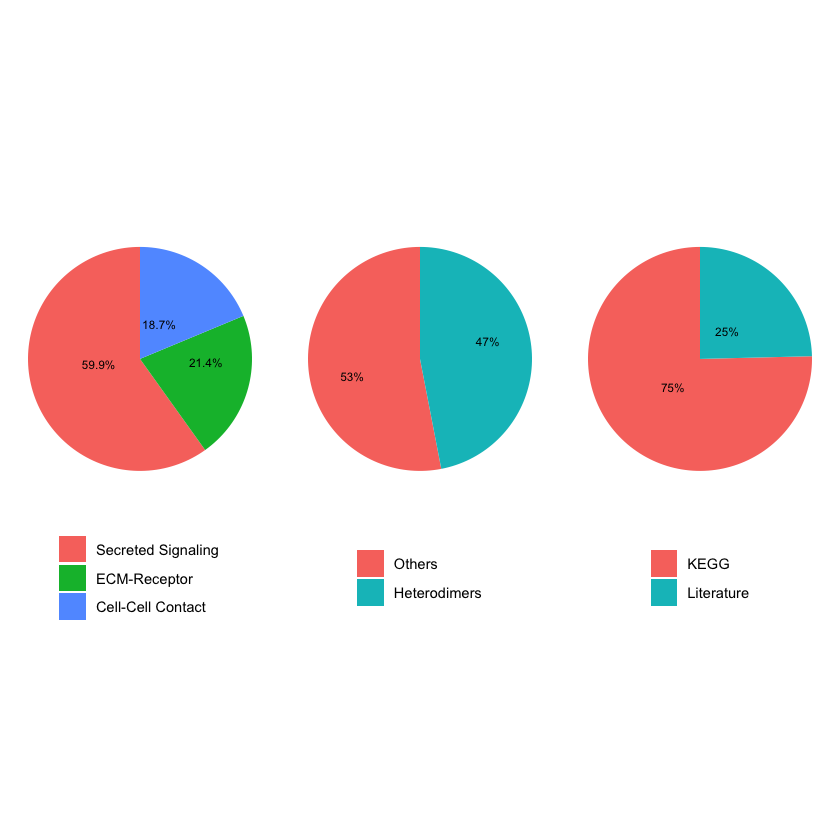

In [4]:
library(patchwork)
options(stringsAsFactors = FALSE)
CellChatDB <- CellChatDB.mouse
 # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)
dplyr::glimpse(CellChatDB$interaction)
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling")
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 
future::plan("multisession", workers = 4)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat , raw.use = TRUE)
df.net <- subsetCommunication(cellchat, thresh = 100)
write.csv(df.net, file = "0h_compro.csv", row.names = FALSE)

In [4]:
#. Seuratにデータを読み込む方法
library(Seurat)
adata <- Read10X(data.dir = "for_seurat_4h_6", gene.column = 1, cell.column = 1)
adata_dense <- as(as.matrix(Matrix::Matrix(adata)), "matrix")
seurat_obj <- CreateSeuratObject(counts = adata_dense, assay = "RNA", project = "my_project")

seurat_obj <- NormalizeData(seurat_obj,normalization.method = "LogNormalize",
                              scale.factor = 10000)

 要求されたパッケージ SeuratObject をロード中です 

 要求されたパッケージ sp をロード中です 

‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the
current version is 1.6.5; it is recomended that you reinstall
‘SeuratObject’ as the ABI for ‘Matrix’ may have changed


 次のパッケージを付け加えます: ‘SeuratObject’ 


 以下のオブジェクトは ‘package:BiocGenerics’ からマスクされています:

    intersect


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect



 次のパッケージを付け加えます: ‘Seurat’ 


 以下のオブジェクトは ‘package:igraph’ からマスクされています:

    components


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts



In [5]:
#. Cellchat用に出力する方法
data.input <- GetAssayData(seurat_obj, assay　= "RNA", layer = "data") # normalized data matrix
labels <- Idents(seurat_obj)
meta <- data.frame(group = labels, row.names = names(labels)) # create a dataframe of the cell labels
 # group.byパラメータに正しい列名を指定してcreateCellChatを実行
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "group")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  CC4h GC4h 


Rows: 2,019
Columns: 11
$ interaction_name   <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2", "TGFB…
$ pathway_name       <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TG…
$ ligand             <chr> "Tgfb1", "Tgfb2", "Tgfb3", "Tgfb1", "Tgfb1", "Tgfb2…
$ receptor           <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1B_TGFb…
$ agonist            <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist", "TG…
$ antagonist         <chr> "TGFb antagonist", "TGFb antagonist", "TGFb antagon…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "TGFb inhibition receptor", "TGFb inhibition recept…
$ evidence           <chr> "KEGG: mmu04350", "KEGG: mmu04350", "KEGG: mmu04350…
$ annotation         <chr> "Secreted Signaling", "Secreted Signaling", "Secret…
$ interaction_name_2 <chr> "Tgfb1 - (Tgfbr1+Tgfbr2)", "Tgfb2  - (Tgfbr1+Tgfbr2…
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellCh

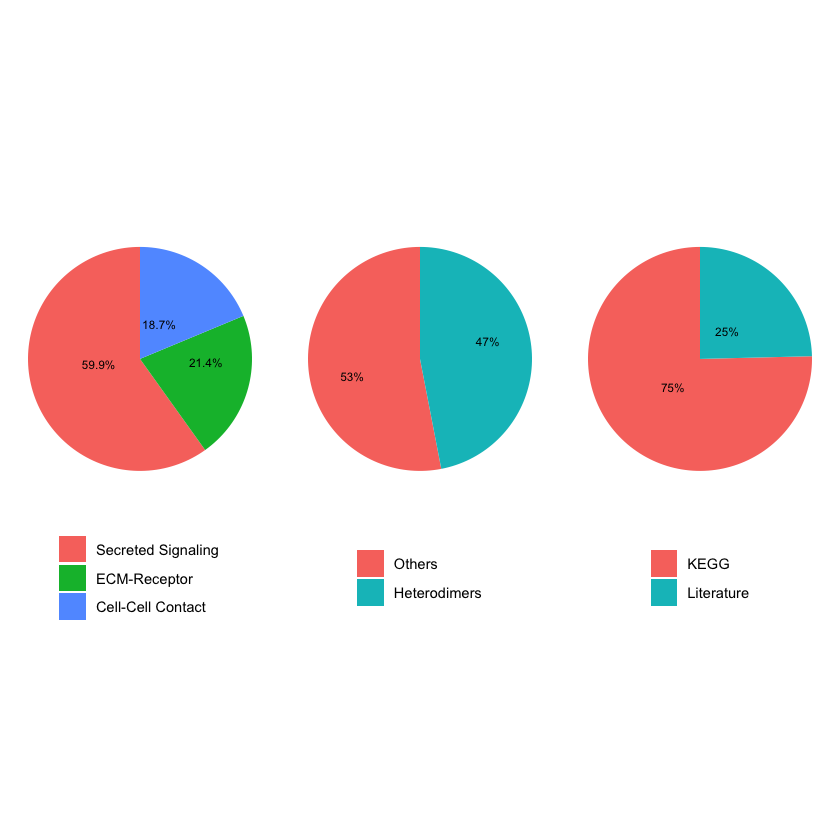

In [6]:
library(patchwork)
options(stringsAsFactors = FALSE)
CellChatDB <- CellChatDB.mouse
 # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)
dplyr::glimpse(CellChatDB$interaction)
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling")
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 
future::plan("multisession", workers = 4)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteraction's(cellchat)
cellchat <- computeCommunProb(cellchat , raw.use = TRUE)
df.net <- subsetCommunication(cellchat, thresh = 100)
write.csv(df.net, file = "4h_compro.csv", row.names = FALSE)

In [5]:
#. Seuratにデータを読み込む方法
library(Seurat)
adata <- Read10X(data.dir = "for_seurat_12h_6", gene.column = 1, cell.column = 1)
adata_dense <- as(as.matrix(Matrix::Matrix(adata)), "matrix")
seurat_obj <- CreateSeuratObject(counts = adata_dense, assay = "RNA", project = "my_project")

seurat_obj <- NormalizeData(seurat_obj,normalization.method = "LogNormalize",
                              scale.factor = 10000)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts



In [6]:
#. Cellchat用に出力する方法
data.input <- GetAssayData(seurat_obj, assay　= "RNA", layer = "data") # normalized data matrix
labels <- Idents(seurat_obj)
meta <- data.frame(group = labels, row.names = names(labels)) # create a dataframe of the cell labels
 # group.byパラメータに正しい列名を指定してcreateCellChatを実行
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "group")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  CC12h GC12h 


Rows: 2,019
Columns: 11
$ interaction_name   <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2", "TGFB…
$ pathway_name       <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TG…
$ ligand             <chr> "Tgfb1", "Tgfb2", "Tgfb3", "Tgfb1", "Tgfb1", "Tgfb2…
$ receptor           <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1B_TGFb…
$ agonist            <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist", "TG…
$ antagonist         <chr> "TGFb antagonist", "TGFb antagonist", "TGFb antagon…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "TGFb inhibition receptor", "TGFb inhibition recept…
$ evidence           <chr> "KEGG: mmu04350", "KEGG: mmu04350", "KEGG: mmu04350…
$ annotation         <chr> "Secreted Signaling", "Secreted Signaling", "Secret…
$ interaction_name_2 <chr> "Tgfb1 - (Tgfbr1+Tgfbr2)", "Tgfb2  - (Tgfbr1+Tgfbr2…
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellCh

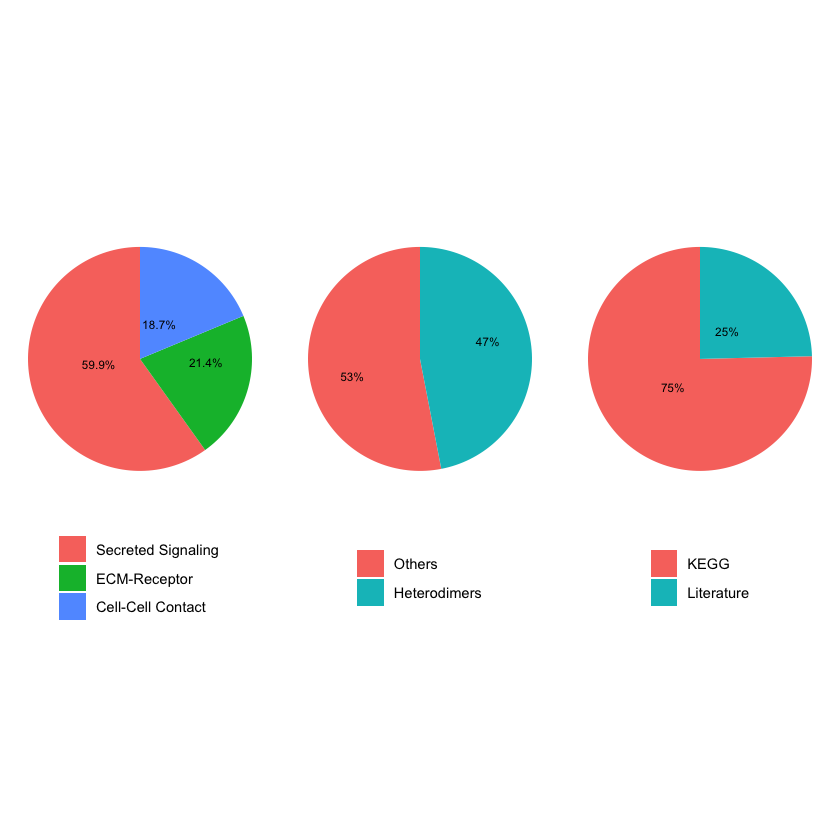

In [7]:
library(patchwork)
options(stringsAsFactors = FALSE)
CellChatDB <- CellChatDB.mouse
 # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)
dplyr::glimpse(CellChatDB$interaction)
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling")
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 
future::plan("multisession", workers = 4)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat , raw.use = TRUE)
df.net <- subsetCommunication(cellchat, thresh = 100)
write.csv(df.net, file = "12h_compro.csv", row.names = FALSE)